**Integrals and derivatives!!!**

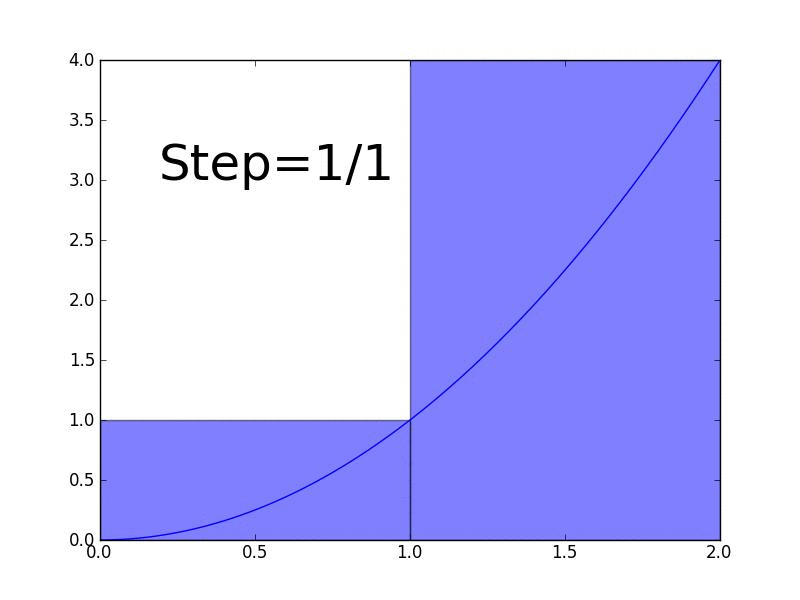

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


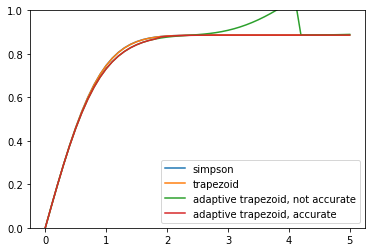

In [ ]:
### Exercise 5.3 from the book, this is the integral of a Gaussian. Let's check with different methods
from numpy import exp
from numpy import linspace
from pylab import plot,ylim,show,legend

xmin = 0.0 ### min start
xmax = 5.0 ### max we integrate out to
N = 10 ### steps for integration, small number!
steps=50 ### steps to draw, not steps for integration

def f(t):
  return exp(-t*t)

xpoints = linspace(xmin,xmax,steps+1)
ypoints_simpson = []
ypoints_trapezoid = []
ypoints_adaptive_low = []
ypoints_adaptive_high = []
accuracy_low = 0.5
accuracy_high = 0.05
for x in xpoints:
  ypoints_simpson.append(simpson(f,xmin,x,N))
  ypoints_trapezoid.append(trapezoid(f,xmin,x,N))
  ypoints_adaptive_low.append(adaptive_trapezoid(f,xmin,x,accuracy_low))
  ypoints_adaptive_high.append(adaptive_trapezoid(f,xmin,x,accuracy_high))

plot(xpoints,ypoints_simpson,label="simpson")  
plot(xpoints,ypoints_trapezoid,label="trapezoid")  
plot(xpoints,ypoints_adaptive_low,label="adaptive trapezoid, not accurate")  
plot(xpoints,ypoints_adaptive_high,label="adaptive trapezoid, accurate")  
ylim(0.0,1.0)
legend()
show()

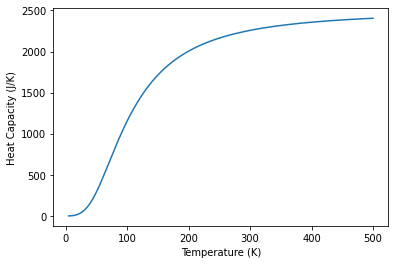

In [ ]:
### Exercise 5.9
from math import exp,expm1
from pylab import plot,show,xlabel,ylabel

def simpson_simple(f, a, b, n):  
  h = (b - a) / n
  s1 = 0.0
  for k in range(1,n,2):
    s1 += f(a+k*h)
  s2 = 0.0
  for k in range(2,n,2):
    s2 += f(a+k*h)
  
  s = f(a) + f(b)
  s += 4 * s1
  s += 2 * s2    
  return s * h / 3


V = 0.001 ### Volume in cubic meters
rho = 6.022e28 ### Number density of aluminum
thetaD = 428.0 ### Debye temperature of aluminum
kB = 1.38065e-23 ### Boltzmann's constant
N = 500

# Integrand
def f(x):
  return(x**4)*exp(x)/(expm1(x)**2) ### expm1 is useful here for small x!

### Function to compute cv, using simpson
def cv(T):
  a = 0.000001 ### can't set to zero, or we divide by zero
  b = thetaD/T
  return 9*V*rho*kB*((T/thetaD)**3)*simpson_simple(f,a,b,N)

### main program, and plotting
tpoints = []
cpoints = []

for T in range(5,501):
  tpoints.append(T)
  cpoints.append(cv(T))

plot(tpoints,cpoints)
xlabel("Temperature (K)")
ylabel("Heat Capacity (J/K)")
show()

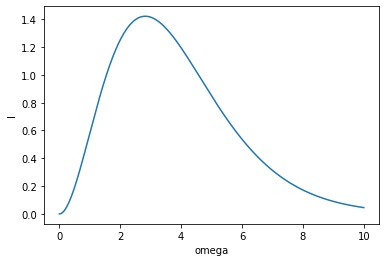

In [ ]:
# Exercise 5.12
from math import exp,expm1,pow
from pylab import plot,show,xlabel,ylabel

def funcI(omega):
  return pow(omega,3)/(expm1(omega))

N=500
xpoints = linspace(0.000001,10,N)
ypoints = []
for x in xpoints:
  ypoints.append(funcI(x))

plot(xpoints,ypoints)
xlabel("omega")
ylabel("I")
show()



In [ ]:
# Exercise 5.12 continued
from math import exp,expm1,pow
from pylab import plot,show,xlabel,ylabel

def funcI(omega):
  return pow(omega,3)/(expm1(omega))

def simpson_simple(f, a, b, n):  
  h = (b - a) / n
  s1 = 0.0
  for k in range(1,n,2):
    s1 += f(a+k*h)
  s2 = 0.0
  for k in range(2,n,2):
    s2 += f(a+k*h)
  
  s = f(a) + f(b)
  s += 4 * s1
  s += 2 * s2    
  return s * h / 3

print(simpson_simple(funcI,0.0001,10,100))
print(simpson_simple(funcI,0.0001,100,100))
print(simpson_simple(funcI,0.0001,200,100))
print(simpson_simple(funcI,0.0001,10,1000))
print(simpson_simple(funcI,0.0001,100,1000))
print(simpson_simple(funcI,0.0001,200,1000))
print(simpson_simple(funcI,0.0001,200,20000))
print(simpson_simple(funcI,0.0001,400,40000))


6.431923556355499
6.5106034223890665
6.733703321472937
6.431921896947455
6.493941068815315
6.4939660670977934
6.493939402433141
6.4939394024331305


1.51864575984341


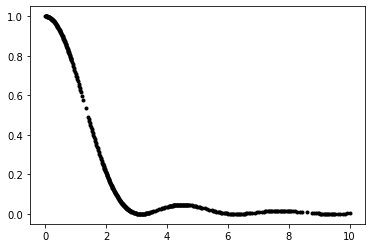

In [1]:
# 5.20

from numpy import sin
from matplotlib.pyplot import plot,show

a = 0.0
b = 10.0
epsilon = 1e-4
delta = epsilon/(b-a)

# The points we use, start with ends only
xpoints = [a,b]

# Integrand
def f(x):
  if x == 0.0:
    return 1.0
  return (sin(x)/x)**2

# Recursive function to do one step
# We pass the values of the function so we don't have to calculate them more than once, which speeds things up!

def step(x1,x2,f1,f2):
  h = x2-x1
  xm = 0.5*(x1+x2)
  xpoints.append(xm)
  fm = f(xm)

  # Calculate two estimates and the error
  I1 = h*(f1+f2)/2
  I2 = h*(f1+2*fm+f2)/4
  if abs(I2-I1)/3 < (delta*h): ### we are done with this slice!
    return h*(f1+4*fm+f2)/6 # use improved simpson's rule
  
  # Point was too large, divide into two parts and repeat
  I1 = step(x1,xm,f1,fm) # First part
  I2 = step(xm,x2,fm,f2) # Second part
  return I1+I2 # return the sum of the two pieces

# Main program
fa = f(a)
fb = f(b)
print(step(a,b,fa,fb))

fpoints = []
for x in xpoints:
  fpoints.append(f(x))
plot(xpoints,fpoints,"k.")
show()

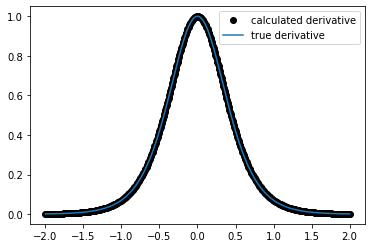

In [ ]:
# Exercise 5.15
# f(x) = 1+0.5*tanh(2x)
# f'(x) = 0.5*d/dx(tanh(2x)) = 0.5*2*(1-tanh^2(2x)) = 1-tanh^2(2x) = 1/(cosh^2(2x))
# Calculate f'(x) and compare to true value using central difference derivatives

from math import tanh,cosh
from numpy import linspace
from matplotlib.pyplot import plot,show,legend

a=-2.0
b=2.0
N = 500 ## plotting points we calculate at 
h = 1e-8 ## h size used for derivatives

def f(x):
  return 1+0.5*tanh(2*x)

def fprime_true(x):
  return 1/cosh(2*x)**2

xpoints = linspace(a,b,N)
dpoints_estimated = [] ### derivatives, estimated
dpoints_true = [] ### derivatives, analytic true

for x in xpoints:
  df = (f(x+0.5*h)-f(x-0.5*h))/h
  dpoints_estimated.append(df)
  dpoints_true.append(fprime_true(x))

plot(xpoints,dpoints_estimated,"ko",label="calculated derivative")
plot(xpoints,dpoints_true,label="true derivative")
legend()
show()

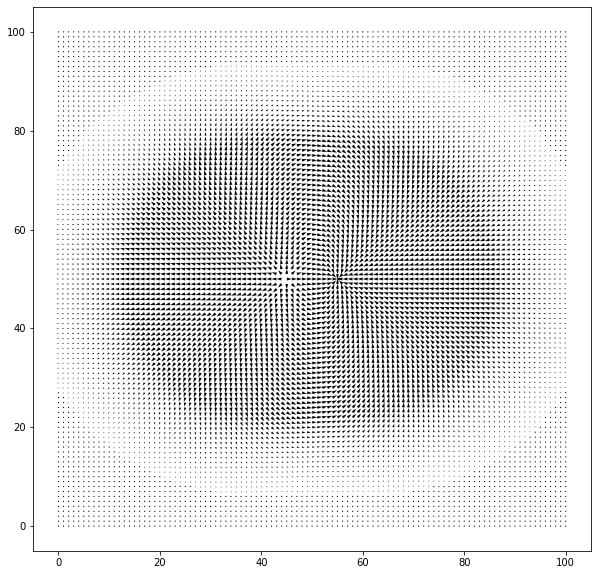

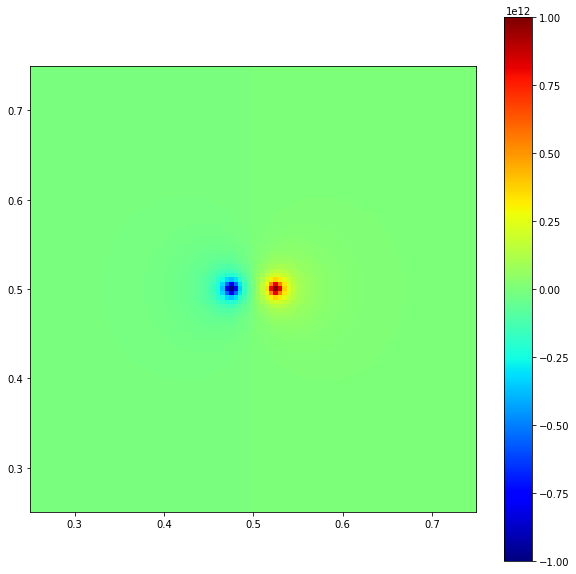

In [ ]:
# Exercise 5.21 electric field of a charge distribution

from math import sqrt,pi
from numpy import empty
from pylab import quiver,show,figure,axis,xlim,ylim,imshow,cm,colorbar

C = 1.0 # charge
d = 0.1 # separation
e0 = 8.8542e-12 # permittivity free space constant
L = 1.0 #size of square
M = 100 # number of points on a side
a = L/M # lattice spacing
epsilon = 1.e-12 #small number
Elimit = 4e10 # Max size of E vector, make things easier to see

# Create array to hold results
phi = empty([M+1,M+1],float)

# Calculate positions of the two points of charge
x1 = (L+d)/2
y1 = L/2
x2 = (L-d)/2
y2 = L/2

# Calculate potential
for i in range(M+1):
  y = i*a
  for j in range(M+1):
    x = j*a

    # Calculate potential at this point
    r1 = sqrt((x-x1)**2+(y-y1)**2)
    r2 = sqrt((x-x2)**2+(y-y2)**2)
    if r1 < epsilon: ## if too close potential is large, cut it off, positive
      phi[i,j] = 1./epsilon
    elif r2 < epsilon: ### it too close to other one
      phi[i,j] = -1./epsilon
    else:
      phi[i,j] = (1/r1-1/r2)*C/(4*pi*e0)

# We have potential, now get the field
Ex = empty([M+1,M+1],float)
Ey = empty([M+1,M+1],float)

# Calculate x components
for i in range(M+1):

  # Edges first
  Ex[i,0] =  (phi[i,1]-phi[i,0])/a
  Ex[i,M] =  (phi[i,M]-phi[i,M-1])/a

  # Now the interior
  for j in range(1,M):
    Ex[i,j] = (phi[i,j+1]-phi[i,j-1])/(2*a)

# Calculate y components now
for j in range(M+1):

  # Edges first
  Ey[0,j] =  (phi[1,j]-phi[0,j])/a
  Ey[M,j] =  (phi[M,j]-phi[M-1,j])/a

  # Now the interior
  for i in range(1,M):
    Ey[i,j] = (phi[i+1,j]-phi[i-1,j])/(2*a)


# Limit the magnitude for visibility
for i in range(M+1):
  for j in range(M+1):
    E = sqrt(Ex[i,j]**2+Ey[i,j]**2)
    ratio = E/Elimit
    if ratio > 1:
      Ex[i,j] /= ratio
      Ey[i,j] /= ratio

figure(figsize=(10,10))
quiver(Ex,Ey)
show()
figure(figsize=(10,10))
imshow(phi,cmap=cm.jet,extent=[0.25,0.75*L,0.25,0.75*L])
colorbar()
show()

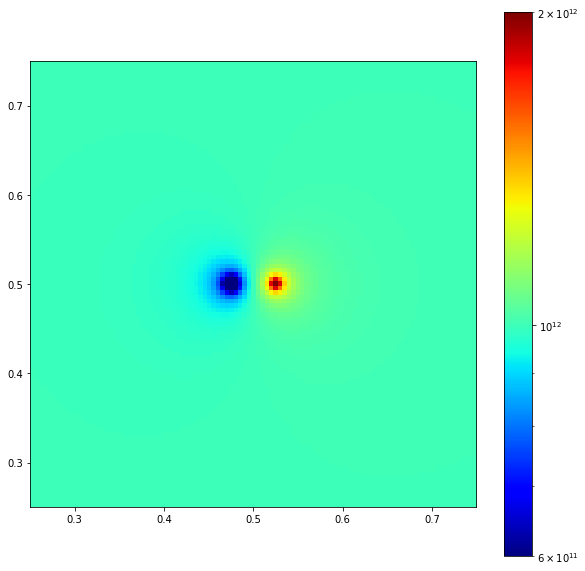

In [ ]:
# Exercise 5.21 electric field of a charge distribution, try and plot potential in a better way

from math import sqrt,pi
from numpy import empty
from pylab import quiver,show,figure,axis,xlim,ylim,imshow,cm,colorbar
from matplotlib import colors

C = 1.0 # charge
d = 0.1 # separation
e0 = 8.8542e-12 # permittivity free space constant
L = 1.0 #size of square
M = 100 # number of points on a side
a = L/M # lattice spacing
epsilon = 1.e-12 #small number
Elimit = 4e10 # Max size of E vector, make things easier to see

# Create array to hold results
phi = empty([M+1,M+1],float)

# Calculate positions of the two points of charge
x1 = (L+d)/2
y1 = L/2
x2 = (L-d)/2
y2 = L/2

# Calculate potential
for i in range(M+1):
  y = i*a
  for j in range(M+1):
    x = j*a

    # Calculate potential at this point
    r1 = sqrt((x-x1)**2+(y-y1)**2)
    r2 = sqrt((x-x2)**2+(y-y2)**2)
    if r1 < epsilon: ## if too close potential is large, cut it off, positive
      phi[i,j] = 1./epsilon
    elif r2 < epsilon: ### it too close to other one
      phi[i,j] = -1./epsilon
    else:
      phi[i,j] = (1/r1-1/r2)*C/(4*pi*e0)

### We can add any constant value to the potential and it doesn't matter. 
### Shift the minimum to be just above zero so we can plot on a log scale
### Add epsilon to be > 0

phi = phi - phi.min() + epsilon

figure(figsize=(10,10))
norm=colors.LogNorm(0.3*phi.max(),phi.max(),clip='True')
imshow(phi,cmap=cm.jet,extent=[0.25*L,0.75*L,0.25*L,0.75*L],norm=norm)
colorbar()
show()

In [ ]:
import time
import numpy as np

def calcFunc(n):
  vec1=np.random.randn(n)
  vec2=np.random.randn(n)
  constant1=np.random.randn(1)
  val = 0
  valnp = 0

  tic = time.perf_counter()
  for i in range(n):
    val += constant*vec1[i]+vec2[i]
  toc = time.perf_counter()

  t = toc-tic

  tic = time.perf_counter()
  valnp = np.sum(constant*vec1+vec2)
  toc = time.perf_counter()
  tnp = toc-tic
  print("Calculated ",val[0], "and with np = ",valnp,"in ",t,"seconds", "and using np ", tnp, ", so speedup = ",t/tnp," for n =",n)

calcFunc(10**1)
calcFunc(10**2)
calcFunc(10**3)
calcFunc(10**4)
calcFunc(10**5)
calcFunc(10**6)
calcFunc(10**7)



Calculated  1.5509281714424852 and with np =  1.550928171442485 in  0.00014834599983259977 seconds and using np  3.9259000004676636e-05 , so speedup =  3.7786494769334014  for n = 10
Calculated  1.9469014407012097 and with np =  1.9469014407012124 in  0.0004383279999728984 seconds and using np  2.9444000119838165e-05 , so speedup =  14.88683596620321  for n = 100
Calculated  -7.380422955204075 and with np =  -7.380422955204125 in  0.004113626999924236 seconds and using np  8.288100002573628e-05 , so speedup =  49.632931536140596  for n = 1000
Calculated  -143.55110563597214 and with np =  -143.55110563597276 in  0.059890726000048744 seconds and using np  0.00012261799997759226 , so speedup =  488.43339486040736  for n = 10000
Calculated  -8.573385696390762 and with np =  -8.573385696391036 in  0.453330878000088 seconds and using np  0.001100286000109918 , so speedup =  412.0118568761217  for n = 100000
Calculated  1045.3538883607448 and with np =  1045.353888360761 in  4.34582858600015